In [1]:
from PyAstronomy import pyasl

# Coordinates of European Southern Observatory
# (Coordinates of UT1)
longitude = 289.5967661
latitude = -24.62586583
altitude = 2635.43

# Coordinates of HD 12345 (J2000)
ra2000 = 030.20313477
dec2000 = -12.87498346

# (Mid-)Time of observation
jd = 2450528.2335

In [2]:
# Calculate barycentric correction (debug=True show
# various intermediate results)
#corr, hjd = pyasl.helcorr(longitude, latitude, altitude,ra2000, dec2000, jd, debug=True)

#print "Barycentric correction [km/s]: ", corr
#print "Heliocentric Julian day: ", hjd

In [3]:
jd = 2.476468576e6

heli, bary = pyasl.baryvel(jd, deq=2000.0)

print "Earth's velocity at JD: ", jd
print "Heliocentric velocity [km/s]: ", heli
print "Barycentric velocity [km/s] : ", bary

# Coordinates of Sirius
ra  = 101.28715535
dec = -16.71611587

vh, vb = pyasl.baryCorr(jd, ra, dec, deq=2000.0)
print "Barycentric velocity of Earth toward Sirius: ", vb

Earth's velocity at JD:  2476468.576
Heliocentric velocity [km/s]:  [  3.27338231 -27.22197754 -11.79786779]
Barycentric velocity [km/s] :  [  3.26337781 -27.22561421 -11.79925053]
Barycentric velocity of Earth toward Sirius:  -22.7886938402


In [4]:
obsAlt = 2400.0

for za in range(0,90,15):
  print "Zenith angle: %2d, airmass = %7.2f" % \
    (za, pyasl.airmassSpherical(za, obsAlt))

Zenith angle:  0, airmass =    0.76
Zenith angle: 15, airmass =    0.79
Zenith angle: 30, airmass =    0.88
Zenith angle: 45, airmass =    1.07
Zenith angle: 60, airmass =    1.52
Zenith angle: 75, airmass =    2.91


In [5]:
pyasl.listObservatories()

List of available observatories

Code           Observatory name
-------------------------------
aao        --- Anglo-Australian Observatory
apo        --- Apache Point Observatory
BAO        --- Beijing XingLong Observatory
bgsuo      --- Bowling Green State Univ Observatory
bmo        --- Black Moshannon Observatory
bosque     --- Estacion Astrofisica Bosque Alegre, Cordoba
ca         --- Calar Alto Observatory
casleo     --- Complejo Astronomico El Leoncito, San Juan
cfht       --- Canada-France-Hawaii Telescope
ctio       --- Cerro Tololo Interamerican Observatory
dao        --- Dominion Astrophysical Observatory
ekar       --- Mt. Ekar 182 cm. Telescope
esolasilla --- La Silla Observatory
esoparanal --- European Southern Observatory (Coordinates of UT1)
flwo       --- Whipple Observatory
fmo        --- Fan Mountain Observatory
holi       --- Observatorium Hoher List (Universitaet Bonn) - Germany
HRT        --- Hamburg Robotic Telescope
HS         --- Hamburger Sternwarte
irtf     

{'BAO': {'altitude': 950.0,
  'latitude': 40.3933334351,
  'longitude': 117.574996948,
  'name': 'Beijing XingLong Observatory',
  'tz': -8.0},
 'HRT': {'altitude': 2435.0,
  'latitude': 21.0531,
  'longitude': 258.6752,
  'name': 'Hamburg Robotic Telescope',
  'tz': 6.0},
 'HS': {'altitude': 40.0,
  'latitude': 53.48,
  'longitude': 10.2414,
  'name': 'Hamburger Sternwarte',
  'tz': -1.0},
 'NOV': {'altitude': 3610.0,
  'latitude': 8.7899999619,
  'longitude': 289.133331299,
  'name': 'National Observatory of Venezuela',
  'tz': 4.0},
 'PTST': {'altitude': 162.0,
  'latitude': 39.64,
  'longitude': 2.95,
  'name': 'Planetary Transit Search Telescope (Hamburger Sternwarte), Mallorca',
  'tz': -1.0},
 'Palomar': {'altitude': 1706.0,
  'latitude': 33.3559989929,
  'longitude': 243.137001038,
  'name': 'The Hale Telescope',
  'tz': 8.0},
 'aao': {'altitude': 1164.0,
  'latitude': -31.2770385742,
  'longitude': 149.066085815,
  'name': 'Anglo-Australian Observatory',
  'tz': -10.0},
 'apo'

In [6]:
import datetime
import numpy as np

# Hour angle 0. means transiting the local meridian.
ha = 0.
# Declination of object
dec = 30.
# Latitude of the observer (here Hamburger Sternwarte)
lat = +53.48
print "Get altitude and azimuth of object in DEGREES"
print pyasl.hadec2altaz(ha, dec, lat)

# List of coordinates
ha = np.arange(0.,20.,5.)
dec = np.arange(30.,50.,5.)
lat = np.zeros(dec.size)+53.48
print
print "Get altitude and azimuth for a list of objects from same observer latitude"
altaz = pyasl.hadec2altaz(ha, dec, lat)
print "alt: ", altaz[0]
print "az: ", altaz[1]

Get altitude and azimuth of object in DEGREES
(66.519999999999996, 180.0)

Get altitude and azimuth for a list of objects from same observer latitude
alt:  [ 66.52        71.18757435  74.91164879  77.09172247]
az:  [ 180.          192.79104338  210.73167203  235.0096414 ]


Populating the interactive namespace from numpy and matplotlib

Get horizontal coordinates (alt, az, ha) from JD, RA,
  and DEC for the Hamburger Sternwarte
(array([-2.3638133]), array([ 20.96879168]), array([ 204.36854879]))

From a list of Julian dates ...
JD = 2.4564e+06 : alt = -40.2213,  az =  289.528,  ha =  123.723
JD = 2.4564e+06 : alt = -74.8732,  az =  65.3946,  ha =  195.92
JD = 2.4564e+06 : alt = -13.6003,  az =  62.8454,  ha =  268.117
JD = 2.4564e+06 : alt =  32.1543,  az =  20.1365,  ha =  340.314
JD = 2.4564e+06 : alt =  15.7073,  az =  314.508,  ha =  52.5114

For one object and different times at the VLT...


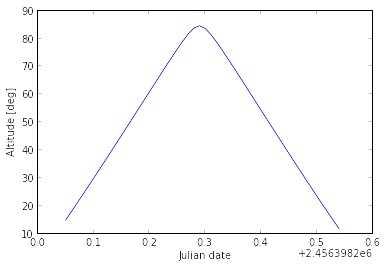

In [7]:
%pylab inline
# Convert calender date to JD
# use the datetime package
jd = datetime.datetime(2013, 4, 16)
jd = pyasl.jdcnv(jd)
# Specifiy RA and DEC
ra = 10.
dec = 30.
print
print "Get horizontal coordinates (alt, az, ha) from JD, RA,"
print "  and DEC for the Hamburger Sternwarte"
print pyasl.eq2hor(jd, ra, dec, observatory="HS")

print
print "From a list of Julian dates ..."
jds = np.arange(jd,jd+1,.2)
ras = np.zeros(jds.size) + ra
decs = np.zeros(jds.size) + dec
alt, az, ha = pyasl.eq2hor(jds, ras, decs, lon=-70.4042, lat=-24.6272, alt=2635.)

for i in range(alt.size):
  print "JD = %g : alt = % g,  az = % g,  ha = % g" % (jds[i], alt[i], az[i], ha[i])


print
print "For one object and different times at the VLT..."
jds = np.arange(jd-.25,jd+.25,.01)
ras = np.zeros(jds.size) + 130.
decs = np.zeros(jds.size) - 30.
res = pyasl.eq2hor(jds, ras, decs, lon=-70.4042, lat=-24.6272, alt=2635.)

plt.plot(jds, res[0])
plt.xlabel("Julian date")
plt.ylabel("Altitude [deg]")
plt.show()

In [8]:
# Assume, a star is observed at an altitude of 50 degrees
alt = 50.
# Now one wants to know the real altitude of the star, i.e.,
# the altitude corrected for atmospheric refraction.
print
print "Get apparent (real) altitude of a star with observed altitude of " + \
      str(alt) + " degrees"
print "  ->  Apparent altitude = ", alt - pyasl.co_refract_forward(alt)

print
print "You are not observing from sea level, but from an altitude of 5000 meter."
print ("Apparent altitude = %9.5f, estimated pressure [mbar] = %9.5f, " + \
      "estimated temperature [K] = %9.5f") % \
      pyasl.co_refract(alt, observer_alt=5000, convert_to_observed=False)

print
print "Convert apparent (real) altitude into observed altitude."
print "Apparent altitude = " + str(alt) + " degrees",
print " -> Observed altitude = " + str(pyasl.co_refract(alt, full_output=False,\
                                       convert_to_observed=True)[0])

print
print "The same object observed from different observer altitudes"
apparentAltitudes = np.repeat(30.0, 10)
obsalts = np.linspace(0.,5000.,len(apparentAltitudes))
r = pyasl.co_refract(apparentAltitudes, observer_alt=obsalts, convert_to_observed=True)
for i in range(len(r[0])):
  print "Observed altitude [deg] = %g, pressure [mbar] = %g, temperature [K] = %g" \
        % (r[0][i], r[1][i], r[2][i])


Get apparent (real) altitude of a star with observed altitude of 50.0 degrees
  ->  Apparent altitude =  [ 49.98608883]

You are not observing from sea level, but from an altitude of 5000 meter.
Apparent altitude =  49.99162, estimated pressure [mbar] = 538.33554, estimated temperature [K] = 250.50000

Convert apparent (real) altitude into observed altitude.
Apparent altitude = 50.0 degrees  -> Observed altitude = 50.0139116888

The same object observed from different observer altitudes
Observed altitude [deg] = 30.0286, pressure [mbar] = 1010, temperature [K] = 283
Observed altitude [deg] = 30.0271, pressure [mbar] = 945.202, temperature [K] = 279.389
Observed altitude [deg] = 30.0257, pressure [mbar] = 883.812, temperature [K] = 275.778
Observed altitude [deg] = 30.0243, pressure [mbar] = 825.691, temperature [K] = 272.167
Observed altitude [deg] = 30.023, pressure [mbar] = 770.705, temperature [K] = 268.556
Observed altitude [deg] = 30.0217, pressure [mbar] = 718.722, temperature [

In [9]:

# Convert calendar date to JD
# using the datetime package
jd = datetime.datetime(2013, 4, 16)
jd = pyasl.jdcnv(jd)
jd = np.arange(jd, jd + 20, 1)
# Calculate Moon positions
res = pyasl.moonpos(jd)

print "%15s  %8s  %8s  %11s  %8s  %8s" % \
  ("JD", "RA", "DEC", "DIST", "GEOLON", "GEOLAT")
print "%15s  %8s  %8s  %11s  %8s  %8s" % \
  ("[d]", "[deg]", "[deg]", "[km]", "[deg]", "[deg]")
for i in range(jd.size):
  print "%15.4f  %8.4f  %8.4f  %11.4f  %8.4f  %8.4f" % \
    (jd[i], res[0][i], res[1][i], res[2][i], res[3][i], res[4][i])

             JD        RA       DEC         DIST    GEOLON    GEOLAT
            [d]     [deg]     [deg]         [km]     [deg]     [deg]
   2456398.5000   88.5142   19.9232  404862.4403   88.6005   -3.5055
   2456399.5000  100.9999   18.8011  404178.8585  100.4351   -4.2373
   2456400.5000  113.3264   16.8522  402256.1504  112.3519   -4.7922
   2456401.5000  125.5037   14.1497  399115.8359  124.4310   -5.1444
   2456402.5000  137.5898   10.7831  394881.4407  136.7505   -5.2697
   2456403.5000  149.6868    6.8599  389781.5734  149.3806   -5.1473
   2456404.5000  161.9320    2.5121  384144.3412  162.3763   -4.7621
   2456405.5000  174.4876   -2.0918  378379.7595  175.7705   -4.1099
   2456406.5000  187.5233   -6.7341  372945.9174  189.5667   -3.2030
   2456407.5000  201.1890  -11.1416  368297.6666  203.7343   -2.0773
   2456408.5000  215.5717  -14.9928  364823.9236  218.2077   -0.7947
   2456409.5000  230.6415  -17.9515  362787.7936  232.8915    0.5592
   2456410.5000  246.2111  -19.726

In [10]:
jd = datetime.datetime(2013, 4, 16)
jd = pyasl.jdcnv(jd)
jd = np.arange(jd, jd+20,1)
mp = pyasl.moonphase(jd)

print "%15s  %3s" % ("JD", "Phase")
for i in range(jd.size):
  print "%15.4f  %3d%%" % (jd[i], mp[i]*100.)

             JD  Phase
   2456398.5000   27%
   2456399.5000   35%
   2456400.5000   45%
   2456401.5000   54%
   2456402.5000   64%
   2456403.5000   73%
   2456404.5000   82%
   2456405.5000   89%
   2456406.5000   95%
   2456407.5000   99%
   2456408.5000   99%
   2456409.5000   98%
   2456410.5000   93%
   2456411.5000   86%
   2456412.5000   77%
   2456413.5000   66%
   2456414.5000   55%
   2456415.5000   44%
   2456416.5000   33%
   2456417.5000   23%


In [11]:
# Convert calendar date into JD
# use the datetime package
jd = datetime.datetime(2013, 4, 16)
jd = pyasl.jdcnv(jd)
print "JD = " + str(jd)
pos = pyasl.sunpos(jd, full_output=True)
print "Coordinates of the Sun (ra, dec): %g, %g" % (pos[1], pos[2])
print "Solar elongation = %g and obliquity = %g" % (pos[3], pos[4])

# Get the Sun's RA and DEC values for a period of time.
startjd = datetime.datetime(2013, 4, 16)
endjd = datetime.datetime(2013, 6, 16)
# Convert into Julian dates
startjd = pyasl.jdcnv(startjd)
endjd = pyasl.jdcnv(endjd)
print
pos = pyasl.sunpos(startjd, end_jd=endjd, jd_steps=10, plot=False, full_output=True)

for i in range(len(pos[0])):
  print "At JD = %g: ra = %g, dec = %g" % (pos[0][i], pos[1][i], pos[2][i])

JD = 2456398.5
Coordinates of the Sun (ra, dec): 24.2677, 10.1019
Solar elongation = 26.1704 and obliquity = 23.4358

At JD = 2.4564e+06: ra = 24.2677, dec = 10.1019
At JD = 2.4564e+06: ra = 29.9487, dec = 12.2108
At JD = 2.45641e+06: ra = 35.6976, dec = 14.1946
At JD = 2.45642e+06: ra = 41.5272, dec = 16.034
At JD = 2.45642e+06: ra = 47.4452, dec = 17.7091
At JD = 2.45643e+06: ra = 53.4517, dec = 19.2001
At JD = 2.45644e+06: ra = 59.5421, dec = 20.4887
At JD = 2.45644e+06: ra = 65.7114, dec = 21.5595
At JD = 2.45645e+06: ra = 71.9519, dec = 22.3991
At JD = 2.45645e+06: ra = 78.2488, dec = 22.9961


In [12]:
today=datetime.datetime.utcnow()
print today
jd = pyasl.jdcnv(today)
print jd
pyasl.ct2lst(jd,21.41068)

2015-06-03 14:48:36.153803
2457177.11709


9.0202213392476551

In [13]:
datetime.datetime.utcnow()

datetime.datetime(2015, 6, 3, 14, 48, 36, 365438)